<a href="https://colab.research.google.com/github/HisakaKoji/try/blob/main/%E7%95%B0%E5%B8%B8%E6%A4%9C%E7%9F%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR

data  = np.concatenate(
    [np.random.normal(0.7, 0.05, 300),
     np.random.normal(1.5, 0.05, 300),
     np.random.normal(0.6, 0.05, 300),
     np.random.normal(1.4, 0.05, 300)])

model = AR(data)
result = model.fit()
sigma = result.sigma2
yt = result.predict()
omicron = 0.0005
score = []
for i in range(len(yt)):
    score.append(-math.log(1/(2*math.pi**0.5*sigma**0.5)*math.exp(-0.5*(data[i]-yt[i])**2)))
# 平滑化
window_size = 15
zt = []
s = []
for i in range(0, len(score)-window_size):
    for t in range(1, window_size+1):
        s.append(score[i+t]/window_size)
    zt.append(sum(s)/window_size)
    s = []

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


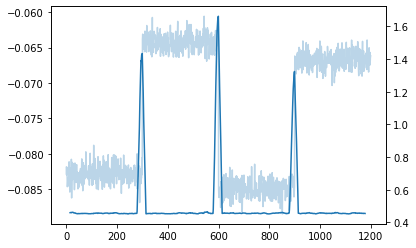

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(window_size, len(zt)+window_size), zt, label="score")
ax2 = ax.twinx()
ax2.plot(data, alpha=0.3, label="observation")

In [4]:
flag = False
for i in range(len(zt)):
    if zt[i] > 1 and flag == False:
        print("異常値:",zt[i], "異常発生点:" , i)
        flag = True
    if zt[i] < 0.1:
        flag = False

# 第二段階学習も実装

In [5]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#zt = scaler.fit_transform(np.array(zt).reshape(-1, 1))

In [6]:
model2 = AR(zt)

In [7]:
result2 = model2.fit()
sigma2 = result2.sigma2*10
yt2 = result2.predict()

In [8]:
yt2

array([-0.08838663, -0.08840057, -0.08840458, ..., -0.0884031 ,
       -0.08839533, -0.08838536])

In [9]:
score2 = []
for i in range(len(yt2)):
    score2.append(-math.log((1/(2*math.pi**0.5*sigma2**0.5))*math.exp(-0.5*(zt[i]-yt2[i])**2)))
# 平滑化
window_size2 = 50
zt2 = []
s2 = []
for i in range(0, len(score2)-window_size2):
    for t in range(1, window_size2+1):
        s2.append(score2[i+t]/window_size2)
    zt2.append(sum(s2)/window_size2)
    s2 = []

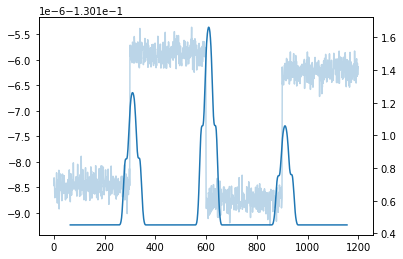

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(window_size+window_size2, len(zt2)+window_size+window_size2), zt2, label="score")
ax2 = ax.twinx()
ax2.plot(data, alpha=0.3, label="observation")

# 本家のChangeFinder

In [11]:
!pip install changefinder

     |████████████████████████████████| 163kB 6.1MB/s 
  Created wheel for changefinder: filename=changefinder-0.3-cp36-none-any.whl size=3824 sha256=a5e190b3e769f1d1da367f4b306cb427db233cfbf1a70271d9fb19741ce0d14f
  Stored in directory: /root/.cache/pip/wheels/ab/1c/de/3c0c0e4a6ee252b83ae19b252f3ae4f0a8ba4799c253afbd92
Successfully built changefinder


In [12]:
import changefinder

cf = changefinder.ChangeFinder(r=0.03, order=1, smooth=7)
result3 = np.empty(len(data))
for i, d in enumerate(data):
    result3[i] = cf.update(d)

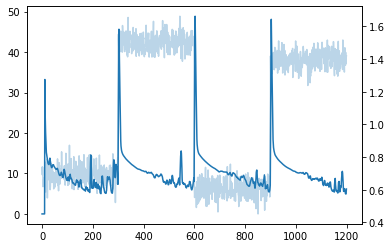

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(result3, label="score")
ax2 = ax.twinx()
ax2.plot(data, alpha=0.3, label="observation")